## Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Reading the file
还是蘑菇数据集，直接采用Kaggle竞赛中[22维特征](https://www.kaggle.com/uciml/mushroom-classification)

In [2]:
# path to where the data lies
dpath = './data/'
data = pd.read_csv(dpath + 'mushrooms.csv')
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Let us check if there is any null values
很幸运，该数据没有空值/缺失数据

In [3]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Check if we have two classification. Either the mushroom is poisonous or edible

In [4]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [5]:
print(data.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


### Check if 22 features(1st one is label) and 8124 instances

In [6]:
data.shape

(8124, 23)

### The dataset has values in strings. We need to convert all the unique values to integers. Thus we perform label encoding on the data

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Separating features and label

In [8]:
X = data.iloc[:, 1:23]
y = data.iloc[:, 0]
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

### Splitting the data into training and testing dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Default Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

In [11]:
model_LR.fit(X_train, y_train)

E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_prob = model_LR.predict_proba(X_test)[:, 1]  # This will give you positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0)  # This will threshold the probabilities to give class predictions
model_LR.score(X_test, y_pred)

1.0

accuracy

In [13]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9554733727810651

## Logistic Regression(Tuned model)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model = LogisticRegression()
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'penalty': ['l1', 'l2']}

### CV

In [15]:
from sklearn.model_selection import GridSearchCV
LR = GridSearchCV(LR_model, tuned_parameters, cv=10)

In [16]:
LR.fit(X_train, y_train)

E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureW

E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureW

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print(LR.best_params_)

{'C': 1000, 'penalty': 'l1'}


In [18]:
y_prob = LR.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
LR.score(X_test, y_pred)

1.0

In [19]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.973422090729783

## Default Decision Tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [21]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
y_prob = model_tree.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_tree.score(X_test, y_pred)

1.0

In [23]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

## Let us tune the hyperparameters of the Decision tree model

In [24]:
from sklearn.tree import DecisionTreeClassifier

model_DD = DecisionTreeClassifier()

tuned_parameters = {'max_features': ['auto', 'sqrt', 'log2'],
                    'min_samples_leaf': range(1, 100, 1),
                    'max_depth': range(1, 50, 1)}

In [25]:
from sklearn.model_selection import GridSearchCV
DD = GridSearchCV(model_DD, tuned_parameters, cv=10)

In [26]:
DD.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': range(1, 100), 'max_depth': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
print(DD.cv_results_)

{'mean_fit_time': array([0.00232308, 0.002092  , 0.00208943, ..., 0.00288482, 0.00309064,
       0.00319519]), 'std_fit_time': array([0.00062836, 0.00029097, 0.00070715, ..., 0.00053199, 0.00053672,
       0.00086651]), 'mean_score_time': array([0.0001977 , 0.00040083, 0.00059831, ..., 0.00089815, 0.00069878,
       0.00098004]), 'std_score_time': array([3.95412003e-04, 4.90949368e-04, 6.61566056e-04, ...,
       3.00567192e-04, 4.57589326e-04, 1.34946601e-05]), 'param_max_depth': masked_array(data=[1, 1, 1, ..., 49, 49, 49],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2', 'log2'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[1, 2, 3, ..., 97, 98, 99],
             mask=[False, False, False, ..., False, False, False],


In [28]:
print(DD.best_score_)

1.0


In [29]:
print(DD.best_params_)

{'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 1}


In [30]:
y_prob = DD.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
DD.score(X_test, y_pred)

1.0

In [31]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       845\n           1       0.99      1.00      0.99       780\n\n   micro avg       0.99      0.99      0.99      1625\n   macro avg       0.99      0.99      0.99      1625\nweighted avg       0.99      0.99      0.99      1625\n'

## Default Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_RR = RandomForestClassifier()

In [33]:
model_RR.fit(X_train, y_train)

E:\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_prob = model_RR.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_RR.score(X_test, y_pred)

1.0

In [35]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

## Let us tuned the parameters of Random Forest just for the purpose of knowledge
1. max_features
2. n_estimators
3. min_samples_leaf

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_RR = RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10, 100, 10),
                    'n_estimators': range(10, 100, 10),
                    'max_features': ['auto', 'sqrt', 'log2']}

In [37]:
from sklearn.model_selection import GridSearchCV
RR = GridSearchCV(model_RR, tuned_parameters, cv=10)

In [38]:
RR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
print(RR.cv_results_)

{'mean_fit_time': array([0.02123988, 0.04026158, 0.05854502, 0.07702301, 0.09594917,
       0.11465063, 0.13340149, 0.15253611, 0.1733403 , 0.02066984,
       0.04039671, 0.05800147, 0.07780838, 0.09504328, 0.11508365,
       0.15414798, 0.17663038, 0.2030755 , 0.02474623, 0.04757266,
       0.06642215, 0.08889089, 0.11101267, 0.12774422, 0.15418749,
       0.18031979, 0.20123796, 0.02473381, 0.04598196, 0.06871581,
       0.0909255 , 0.11477883, 0.13271732, 0.15448344, 0.17629106,
       0.19967749, 0.02443459, 0.04384694, 0.0684164 , 0.09030025,
       0.10950868, 0.13100235, 0.15794749, 0.17684925, 0.20115926,
       0.02962058, 0.06285713, 0.08432527, 0.10138156, 0.1115855 ,
       0.13194008, 0.15430126, 0.17937396, 0.24310625, 0.02269974,
       0.04653583, 0.06617386, 0.0886364 , 0.10732255, 0.1319344 ,
       0.15632672, 0.17197237, 0.19368327, 0.0230382 , 0.04544222,
       0.06991282, 0.08651388, 0.10800889, 0.12686918, 0.1535913 ,
       0.17177029, 0.19185958, 0.02288959, 0

In [40]:
print(RR.best_score_)

0.9998461301738729


In [41]:
print(RR.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 70}


In [42]:
y_prob = RR.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
RR.score(X_test, y_pred)

1.0

In [44]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

In [45]:
## Default XGBoost

In [46]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()

In [47]:
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
y_prob = model_XGB.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_XGB.score(X_test, y_pred)

1.0

In [49]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

## 特征重要性
在XGBoost中特征重要性已经自动算好，存放在feature_importances_

In [50]:
print(model_XGB.feature_importances_)

[0.0042735  0.0042735  0.01282051 0.0042735  0.3696581  0.
 0.05128205 0.04700855 0.04273504 0.01282051 0.03205128 0.04273504
 0.04273504 0.01282051 0.01923077 0.         0.         0.02991453
 0.         0.15170941 0.08333334 0.03632479]


In [51]:
# plot
from matplotlib import pyplot as plt
%matplotlib inline

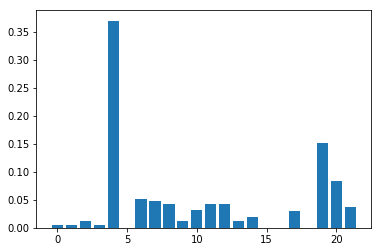

In [52]:
plt.bar(range(len(model_XGB.feature_importances_)), model_XGB.feature_importances_)
plt.show()

上述表是按特征顺序打印，还可以使用XGBoost内嵌的函数，按特征重要性排序

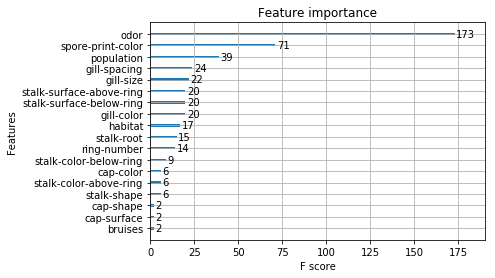

In [53]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(model_XGB)
plt.show()

可以根据特征重要性进行特征选择

In [54]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(model_XGB.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_XGB, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print('Thresh=%.3f, n=%d, Accuracy:%.2f%%' % (thresh, select_X_train.shape[1], accuracy * 100.0))

Thresh=0.000, n=22, Accuracy:100.00%
Thresh=0.000, n=22, Accuracy:100.00%
Thresh=0.000, n=22, Accuracy:100.00%
Thresh=0.000, n=22, Accuracy:100.00%
Thresh=0.004, n=18, Accuracy:100.00%
Thresh=0.004, n=18, Accuracy:100.00%
Thresh=0.004, n=18, Accuracy:100.00%
Thresh=0.013, n=15, Accuracy:100.00%
Thresh=0.013, n=15, Accuracy:100.00%
Thresh=0.013, n=15, Accuracy:100.00%
Thresh=0.019, n=12, Accuracy:100.00%
Thresh=0.030, n=11, Accuracy:100.00%
Thresh=0.032, n=10, Accuracy:100.00%
Thresh=0.036, n=9, Accuracy:100.00%
Thresh=0.043, n=8, Accuracy:100.00%
Thresh=0.043, n=8, Accuracy:100.00%
Thresh=0.043, n=8, Accuracy:100.00%
Thresh=0.047, n=5, Accuracy:100.00%
Thresh=0.051, n=4, Accuracy:99.51%
Thresh=0.083, n=3, Accuracy:99.45%
Thresh=0.152, n=2, Accuracy:99.45%
Thresh=0.370, n=1, Accuracy:98.58%
